In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

"""
Collaborators: Maya Tatarelli, Nicole Ford
"""

'\nCollaborators: Maya Tatarelli, Nicole Ford\n'

# 1.3

We want to numerically solve the differential equation for viscously accreting disks:

$$\partial_t \Sigma = \dfrac{3}{r} \partial_r \left(r^{1/2}\partial_r\left(\nu \Sigma r^{1/2}\right)\right)$$

Taking the derivative using product rule, we obtain:

$$\partial_t \Sigma = \dfrac{3}{2} r^{-3/2}\partial_r\left(\nu \Sigma r^{1/2}\right) + 3 r^{-1/2} \partial_r^2\left(\nu \Sigma r^{1/2}\right)$$

Assuming $\nu$ is constant, we end up with:

$$\partial_t \Sigma = \dfrac{9\nu}{2r} \partial_r\Sigma + 3 \nu \partial_r^2\Sigma $$

The first term corresponds to the advection part, which will be solved using the Lax-Friedrich method, and the second term is the diffusion part, which will be solved using the implicit method.

/var/folders/rp/b21ps17n24v9l0fs5l_qmp9h0000gn/T/ipykernel_51822/597003496.py:10: RuntimeWarning: divide by zero encountered in true_divide
  u = 9*v/2/r # advection


<IPython.core.display.Javascript object>


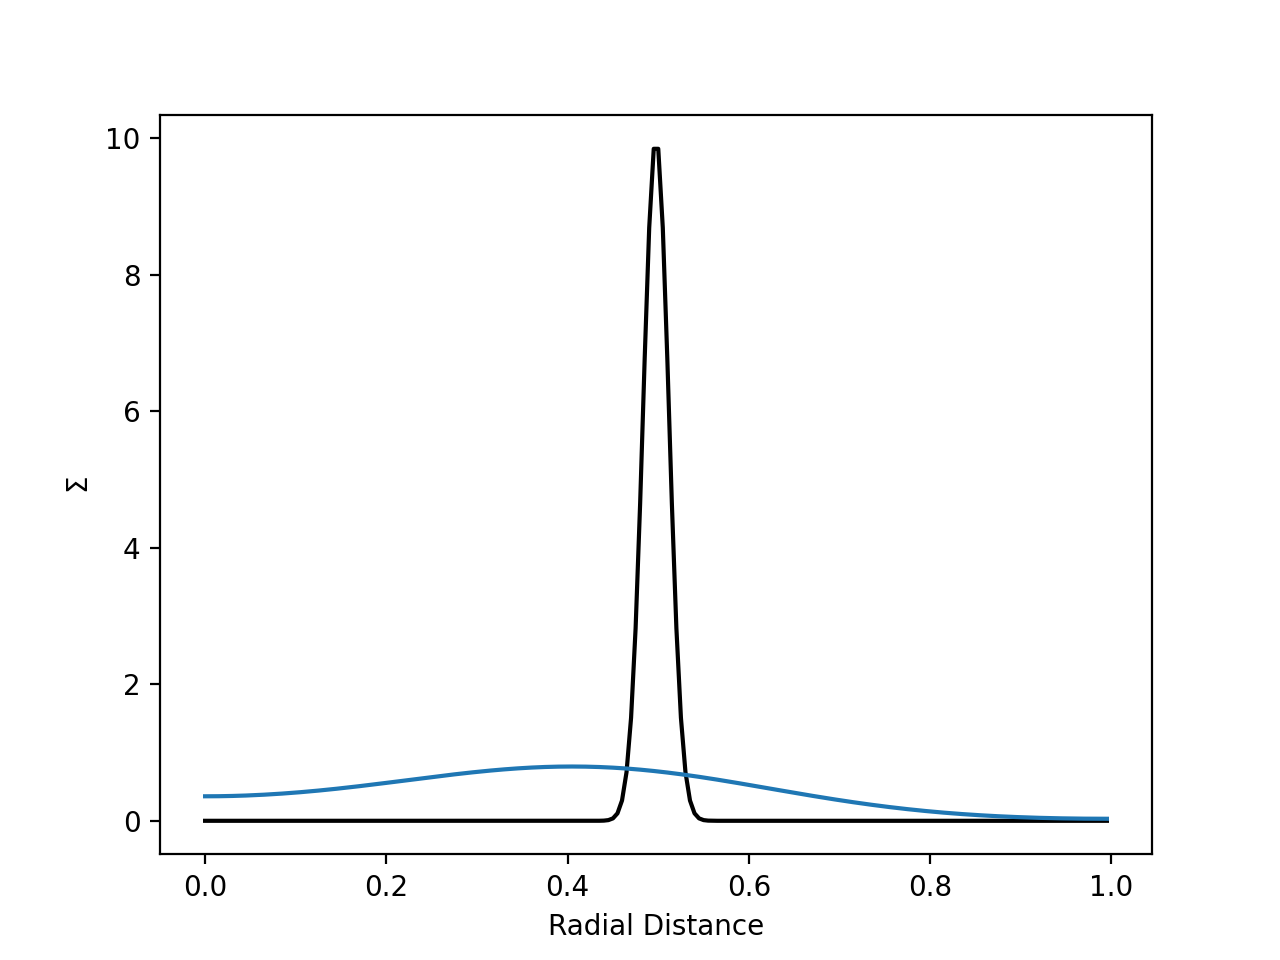

In [2]:
# setting up the grid and parameters
Nsteps = 1800
Ngrid = 200
dr = 1
r = np.arange(0, Ngrid*1., dr)/Ngrid # define the grid, starting at 0 (the center of the disk) out to 1, with steps dr

# defining the relevant quatities
v = 0.5 # viscosity
D = 3*v # diffusion
u = 9*v/2/r # advection
# outflow boudary condition on the velocity
u[0] = -abs(u[1])
u[-1] = abs(u[-2])

# we need dt<=dr/u for convergence (Courant condition)
dt = min(abs(dr/u))

beta = D*dt/(dr**2) # for the diffusion matrix
# setting up the matrix for the diffusion operator
A = np.eye(Ngrid) * (1.0 + 2.0 * beta) + np.eye(Ngrid, k=1) * (-beta) + np.eye(Ngrid, k=-1) * (-beta)

# initializing Sigma so that Sig(r, 0) is a sharp Gaussian at the center of the simulation grid
Sig_num = np.zeros(Ngrid)
Gauss_amp, Gauss_sig = 10, Ngrid/10000 # Gaussian amplitude and sigma
Gaussian = Gauss_amp * np.exp(-(r - r.max()/2)**2 / Gauss_sig**2)
Sig_num += Gaussian


## set up the plot
plt.ion()
fig, ax = plt.subplots(1,1)
ax.plot(r, Sig_num, 'k-')
# setting up the plotting objects that will be updated
plt1, = ax.plot(r, Sig_num)
fig.canvas.draw()

for i in range(Nsteps):
    # solve diffusion
    Sig_num = np.linalg.solve(A, Sig_num)
    
    # solve advection
    Sig_num[1:-1] = 0.5*(Sig_num[2:]+Sig_num[:-2]) + (u[1:-1]*dt/2/dr)*(Sig_num[2:]-Sig_num[:-2])
    
    # outflow boundary
    Sig_num[0] = Sig_num[1]
    Sig_num[-1] = Sig_num[-2]
    
    # update plot
    plt1.set_ydata(Sig_num) # update the densities
    plt.ylabel('$\Sigma$')
    plt.xlabel('Radial Distance')
    fig.canvas.draw()
    plt.pause(0.0001)
    